#Covid 19 Detector

##DATA

In [0]:
!wget http://cb.lk/covid_19

In [0]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [0]:
TRAIN_PATH="/content/CovidDataset/Train"
VAL_PATH="/content/CovidDataset/Val"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image

#Model

In [0]:
#CNN MODEL IN KERAS
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(1,activation=("sigmoid")))
model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])






In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 64)       

In [0]:
#TRAIN
train_datage=image.ImageDataGenerator(
   rescale=1./255,
   shear_range=.2,
   zoom_range=.2,
   horizontal_flip=True,
   )
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [0]:
train_generator=train_datage.flow_from_directory(
    "CovidDataset/Train",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)


Found 224 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
validation_generator=test_dataset.flow_from_directory(
    "CovidDataset/Val",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)


Found 60 images belonging to 2 classes.


In [0]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 0.9990 - accuracy: 0.5312 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.6136 - accuracy: 0.6836 - val_loss: 0.5594 - val_accuracy: 0.6833
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.5089 - accuracy: 0.7578 - val_loss: 0.4500 - val_accuracy: 0.8833
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3626 - accuracy: 0.8398 - val_loss: 0.3686 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.2635 - accuracy: 0.8984 - val_loss: 0.1876 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.1905 - accuracy: 0.9258 - val_loss: 0.0803 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2227 - accuracy: 0.9102 - val_loss: 0.1068 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [0]:
model.save("model_adv.h5")

In [0]:
model.evaluate_generator(train_generator)

[0.051691826432943344, 0.9553571343421936]

In [0]:
model.evaluate_generator(validation_generator)

[0.10043913871049881, 0.9666666388511658]

In [0]:
model=load_model("model_adv.h5")

In [0]:
import os

In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual=[]
y_test=[]

In [0]:
for i in os.listdir('/content/CovidDataset/Val/Normal/'):
  img=image.load_img('/content/CovidDataset/Val/Normal/'+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)


In [0]:
for i in os.listdir('/content/CovidDataset/Val/Covid/'):
  img=image.load_img('/content/CovidDataset/Val/Covid/'+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)


In [0]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

#Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
cm=confusion_matrix(y_actual,y_test)

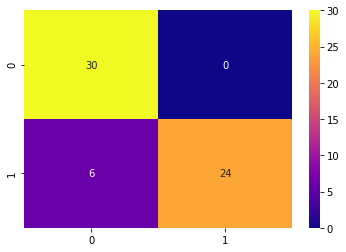

In [0]:
sns.heatmap(cm,cmap="plasma",annot=True)